In [ ]:
#Import
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import matplotlib.cm as cm



#seaborn context
#sns.set_context(rc={"lines.linewidth": 2.5})
plt.rcParams.update({'figure.figsize':(8,4), 'figure.dpi':400 , 'font.size':30})
plt.style.use('ggplot')



#File read
df = pd.read_csv('C:/Users/aless/Desktop/BankCustomerData.csv')

#---bar plot durata media per mese di sondaggio-----------
"""
dfmonth = df[['month','duration']]
months = ["jan", "feb", "mar", "apr", "may", "jun", 
          "jul", "aug", "sep", "oct", "nov", "dec"]
dfmonth['month'] = pd.Categorical(dfmonth['month'], categories=months, ordered= True)
dfmonth = dfmonth.groupby(['month']).mean()
dfmonth.sort_values(by='month')
clrs = ['grey' if (x < max(dfmonth['duration'])) else 'red' for x in dfmonth['duration'] ]
sns.barplot(x=dfmonth.index, y=dfmonth['duration'], palette=clrs)
"""

#----------------------------------------------------------

#---torta per scacchi di età-------------------------------
"""
dfage = df
bins= [18,30,40,50,60,70,100]
labels = ['Ventenni','Trentenni','Quarantenni','Cinquantenni','Sessantenni','Ultra-Settantenni'] 
dfage['AgeGroup'] = pd. cut(dfage['age'], bins=bins, labels=labels, right=False)
dfage = pd.DataFrame(dfage['AgeGroup'].value_counts().reset_index())
plt.pie(data=dfage,x='AgeGroup',labels='index', autopct='%.1f%%')
"""
#-----------------------------------------------------------


#---torta per stato maritale--------------------------------
"""
df1 = pd.DataFrame(df['marital'].value_counts().reset_index())
plt.pie(data=df1,x='marital',labels='index', autopct='%.1f%%')
"""
#-----------------------------------------------------------

#---torta per livello educazione----------------------------
"""
df1 = pd.DataFrame(df['education'].value_counts().reset_index())
plt.pie(data=df1,x='education',labels='index', autopct='%.1f%%')
"""
#-----------------------------------------------------------


#--bar plot COLORI del credito medio per scacchi di età-----
"""
dfbalance = df[['balance','age']]
bins= [18,30,40,50,60,70,80,90,100]
labels = ["20's","30's","40's","50's","60's","70's","80's","90's"] 
dfbalance['AgeGroup'] = pd. cut(dfbalance['age'], bins=bins, labels=labels, right=False)
#dfbalance = dfbalance[['balance','AgeGroup']].groupby(['AgeGroup']).mean().plot.bar()
norm = Normalize(vmin=0, vmax=dfbalance['balance'].max())
cmap = cm.autumn
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)
mappable.set_array(dfbalance['balance'])
fig, ax = plt.subplots()
bars = ax.bar(dfbalance['AgeGroup'], dfbalance['balance'])

ax = bars[0].axes
lim = ax.get_xlim()+ax.get_ylim()
for bar, val in zip(bars, dfbalance['balance']):
    grad = np.atleast_2d(np.linspace(0,val,256)).T
    bar.set_zorder(1)
    bar.set_facecolor('none')
    x, y = bar.get_xy()
    w, h = bar.get_width(), bar.get_height()
    ax.imshow(np.flip(grad), extent=[x,x+w,y,y+h], aspect='auto', zorder=1,interpolation='nearest', cmap=cmap, norm=norm)
ax.axis(lim)
cb = fig.colorbar(mappable)
cb.set_label("Balance")
"""
#-----------------------------------------------------------


#--bar plot COLONNA ROSSA del credito medio per scacchi di età---
"""
dfbalance = df[['balance','age']]
bins= [18,30,40,50,60,70,80,90,100]
labels = ["20's","30's","40's","50's","60's","70's","80's","90's"] 
dfbalance['AgeGroup'] = pd. cut(dfbalance['age'], bins=bins, labels=labels, right=False)
dfbalance = dfbalance[['balance','AgeGroup']].groupby(['AgeGroup']).mean()
clrs = ['grey' if (x < max(dfbalance['balance'])) else 'red' for x in dfbalance['balance'] ]
sns.barplot(x=dfbalance.index, y=dfbalance['balance'], palette=clrs)
"""
#-----------------------------------------------------------


#---Analisi stipendio medio per lavoro-----------------------

dfworkline = df[['job','balance']]
dfworkline = dfworkline.groupby(['job']).mean()
dfworkline.sort_values(by='balance')
clrs = ['grey' if (x < max(dfworkline['balance'])) else 'red' for x in dfworkline['balance'] ]
sns.barplot(x=dfworkline.index, y=dfworkline['balance'], palette=clrs)
plt.xticks(rotation=45)

#------------------------------------------------------------


plt.show()


(34111, 16)
(8528, 16)
(34111, 1)
(8528, 1)
Accuracy: 0.91 	 ---> LogisticRegression 
Accuracy: 0.9 	 ---> DecisionTreeClassifier 
Accuracy: 0.91 	 ---> SVC 
Accuracy: 0.91 	 ---> RandomForestClassifier 
Accuracy: 0.91 	 ---> AdaBoostClassifier 
Accuracy: 0.91 	 ---> GradientBoostingClassifier 
Accuracy: 0.91 	 ---> LinearDiscriminantAnalysis 
LogisticRegression Report di classificazione:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95      7728
           1       0.58      0.17      0.27       800

    accuracy                           0.91      8528
   macro avg       0.75      0.58      0.61      8528
weighted avg       0.89      0.91      0.89      8528

DecisionTreeClassifier Report di classificazione:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7728
           1       0.44      0.45      0.45       800

    accuracy                           0.90      8528
   macro avg 

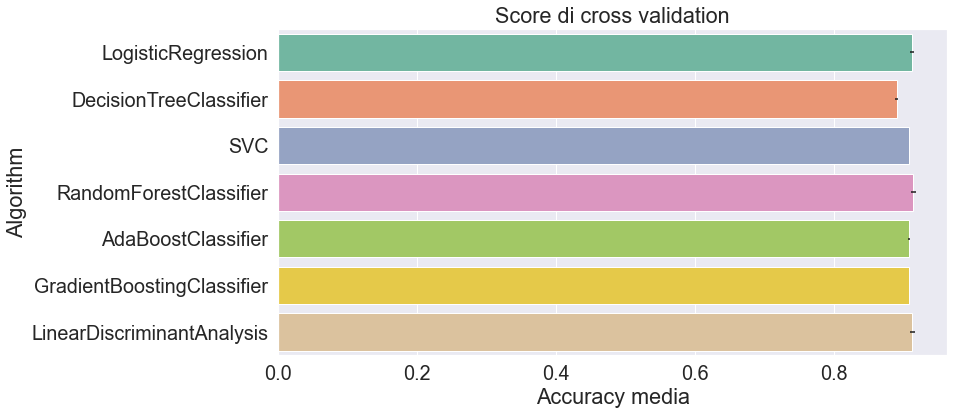

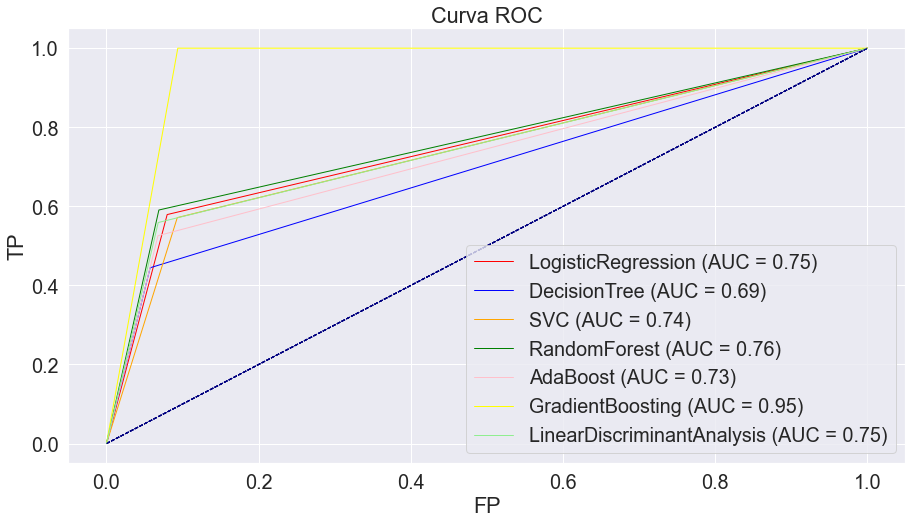

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc
import warnings

warnings.filterwarnings('ignore')
sns.set(font_scale=1.8)


dfTot = pd.read_csv('C:/Users/aless/Desktop/BankCustomerData.csv')

#---data preparation--------

#Togliamo le colonne string
#df = dfTot[['age','balance','day','duration','campaign','pdays','previous']]

#OPPURE

#Convertimo i parametri string ad interi
df = dfTot
df['job']=df['job'].astype('category').cat.codes
df['marital']=df['marital'].astype('category').cat.codes
df['education']=df['education'].astype('category').cat.codes
df['default']=df['default'].astype('category').cat.codes
df['housing']=df['housing'].astype('category').cat.codes
df['loan']=df['loan'].astype('category').cat.codes
df['contact']=df['contact'].astype('category').cat.codes
df['month']=df['month'].astype('category').cat.codes
df['poutcome']=df['poutcome'].astype('category').cat.codes
df['term_deposit']=df['term_deposit'].astype('category').cat.codes

#---------------------------

#---Correlation matrix------
"""
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
"""
#---------------------------

# Random SEED (INTRODUCE UN FATTORE DI RANDOMICITA')
rs = 42

#Si divide il dataset in 80% train e 20% test
x = df.iloc[:,:-1] #feature per fare la predizione
y = df.iloc[:,-1:] #label da predirre (deposito a lungo termine si - no)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)

# controllo sullo SHAPE degli array (es. il test deve essere sempre x:1 e il train x:16)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    AdaBoostClassifier(n_estimators=10, random_state=rs),
    GradientBoostingClassifier(n_estimators=10, random_state=rs),
    LinearDiscriminantAnalysis()
]


clf_name = [] #nomi classificatori
model_results = pd.DataFrame.copy(y_test) #array di predizioni fatte dai modelli

kfold = StratifiedKFold(n_splits=5) #cross-validation 
cv_results = [] # score cross validation
cv_acc = [] # accuracy cross validation
cv_std = [] # deviazione standard dalla cross validation

cnfm = [] #matrice di confusione
clr = [] #report di classificazione
roc_auc = [] #curva roc
roc_tpr = []
roc_fpr = []

#ALLENAMENTO MODELLI
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting e predictions
    model = clf.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy e log loss
    cv_results.append(cross_val_score(clf, x_train, y_train, scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test, y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    cnfm.append(confusion_matrix(y_test, y_pred))
    clr.append(classification_report(y_test, y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())


cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot(x="CrossValMeans",y="Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Accuracy media")
plt.title("Score di cross validation")

for i in range(len(classifiers)):
    print (f"{clf_name[i]} Report di classificazione:" )
    print (clr[i])

#CURVA ROC
plt.figure(figsize=(15,8))
for i in range(len(classifiers)):
    cm = ['red', 'blue', 'orange', 'green', 'pink', 'yellow', 'lightgreen', 'black', 'purple', 'lightblue'] #add more colours for more algorithms
    plt.plot(roc_fpr[i], roc_tpr[i], c=cm[i], lw=1, label=clf_name[i].replace("Classifier", "") + " (AUC = " + str(round(roc_auc[i],2)) + ")")
    plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
    plt.xlabel('FP')
    plt.ylabel('TP')
    plt.title('Curva ROC')
    plt.legend(loc="lower right")

In [7]:
from MetaCost import MetaCost
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc
import warnings
from pandas.util.testing import assert_frame_equal


S = pd.read_csv('C:/Users/aless/Desktop/BankCustomerData.csv')
S['job']=S['job'].astype('category').cat.codes
S['marital']=S['marital'].astype('category').cat.codes
S['education']=S['education'].astype('category').cat.codes
S['default']=S['default'].astype('category').cat.codes
S['housing']=S['housing'].astype('category').cat.codes
S['loan']=S['loan'].astype('category').cat.codes
S['contact']=S['contact'].astype('category').cat.codes
S['month']=S['month'].astype('category').cat.codes
S['poutcome']=S['poutcome'].astype('category').cat.codes
S['term_deposit']=S['term_deposit'].astype('category').cat.codes

C = np.array([[0, 4],[1, 0]])

clf = DecisionTreeClassifier(random_state = 42, criterion = 'log_loss')


model = MetaCost(S, clf, C).fit(flag="term_deposit",num_class=2)
x = S.iloc[:,:-1] #feature per fare la predizione
ypred = model.predict(x)    
"""
acc = round(accuracy_score(S['term_deposit'], ypred), 4)
print("Accuracy totale :"+str(acc))
print(f1_score(S['term_deposit'], ypred, average="macro"))
print(precision_score(S['term_deposit'], ypred, average="macro"))
print(recall_score(S['term_deposit'], ypred, average="macro")) 
"""
print(classification_report(S['term_deposit'],ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     38678
           1       0.82      1.00      0.90      3961

    accuracy                           0.98     42639
   macro avg       0.91      0.99      0.94     42639
weighted avg       0.98      0.98      0.98     42639



c:\Users\aless\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
